In [1]:
using Random
using Statistics
using Distributions
using ShiftedArrays
using CategoricalArrays
# using StatsPlots
using HypothesisTests

using DataFrames
using DataFramesMeta
using SpecialFunctions
using LinearAlgebra
using StatsFuns
using MixedModels
using CodecZlib
using JLD2
using Serialization
using LaTeXStrings

using CairoMakie  
# CairoMakie.activate!(inline=true)
CairoMakie.activate!(type = "png", inline=true, px_per_unit=2.0, pt_per_unit=1.0)

In [6]:
# using RLSR
using EM
include("../code/em_scripts.jl")
include("../code/sailing_base_mbsr_blockwise_betas_w_twotd.jl");

In [7]:
function unitnorm(x)
    0.5 .+ 0.5 .* erf.(x ./ sqrt(2))
end

function get_grouplevel_beta(r, varname)
    return r.betas[findfirst(r.varnames .== varname)]
end

function get_subject_beta(r, varname, subject)
    return r.x[subject, findfirst(r.varnames .== varname)]
end

function get_all_subjects_beta(r, varname)
    return r.x[:, findfirst(r.varnames .== varname)]
end

get_all_subjects_beta (generic function with 1 method)

In [8]:
set_theme!()
update_theme!(
        fontsize = 7,
        fonts = (; regular= "Helvetica", bold="Helvetica"),
        figure_padding = (5.0, 5.0, 5.0, 5.0),
        Lines = (
            linewidth = 1.0,
        )
    )


In [9]:
file_prefix = "blockwise"
full_df = load("../derived/$(file_prefix).jld2")["full_df"]
ntrials = maximum(full_df.trial)
full_df[1:5, :]

Row,state1,state2,state3,endState,endBranchLeft,reward,action1Left,action2Left,rewardₜ₋₁,rewardₜ₋₂,state1ₜ₋₁,state1ₜ₋₂,state1ₜ₋₃,state2ₜ₋₁,state2ₜ₋₂,state3ₜ₋₁,state3ₜ₋₂,endStateₜ₋₁,endStateₜ₋₂,endBranchLeftₜ₋₁,endBranchLeftₜ₋₂,trial,subject,action1TowardsPrevEnd,action1Persistance,endBranchₜ₋₁SameAsLastChoice,priorMoveAt1,priorMoveAt2,priorMoveAt3,parentPriorMove,parentPriorMoveToEndState,parentPriorMoveToEndStateₜ₋₁,priorRewardAt2,priorRewardAt3,priorRewardAt4,priorRewardAt5,priorRewardAt6,priorRewardAt7,endStateSiblingPriorReward,endStateSiblingPriorRewardₜ₋₁,endStatePriorReward,endStatePriorRewardₜ₋₁,endStatePriorRewardₜ₋₂,priorRewardLeftBranch,priorRewardRightBranch,endStateBranchPriorReward,endStateBranchPriorRewardₜ₋₁,endStateBranchPriorRewardₜ₋₂,sub,assignment,r1,r2,r3,r4,rt_boat,rt_island,rewscaled,rwd_swap,rwd_swap_type,block_ind,block_num
,Int64,Int64,Int64,Int64,Bool,Float64,Bool?,Bool?,Float64?,Float64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Bool?,Bool?,Int64,String,Bool?,Bool?,Bool?,Int64?,Int64?,Int64?,Int64?,Bool?,Bool?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,String,Float64,Float64,Float64,Float64,Real,Union…,Float64,Bool,String,Int64,Int64
1,1,3,6,6,false,0.0,false,true,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1,001,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,31.6,1743.3,-1.0,false,start,0,0
2,4,-1,-1,4,true,1.0,missing,missing,0.0,missing,1,missing,missing,3,missing,6,missing,6,missing,false,missing,2,001,missing,missing,missing,3,missing,6,missing,missing,missing,missing,missing,missing,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.0,missing,missing,missing,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,3324.2,,1.0,false,start,1,0
3,1,2,4,4,true,1.0,true,true,1.0,0.0,4,1,missing,missing,3,missing,6,4,6,true,false,3,001,true,false,false,3,missing,6,missing,missing,missing,missing,missing,1.0,missing,0.0,missing,missing,missing,1.0,missing,missing,1.0,0.0,1.0,missing,missing,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,1050.3,967,1.0,false,start,2,0
4,7,-1,-1,7,false,1.0,missing,missing,1.0,1.0,1,4,1,2,missing,4,missing,4,4,true,true,4,001,missing,missing,true,2,4,6,6,false,missing,missing,missing,1.0,missing,0.0,missing,0.0,missing,missing,1.0,missing,1.0,0.0,0.0,1.0,missing,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,2148.6,,1.0,false,start,3,0
5,1,2,4,4,true,1.0,true,true,1.0,1.0,7,1,4,missing,2,missing,4,7,4,false,true,5,001,false,true,false,2,4,6,4,true,false,missing,missing,1.0,missing,0.0,1.0,missing,0.0,1.0,missing,1.0,1.0,1.0,1.0,0.0,1.0,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,841.6,1189.4,1.0,false,start,4,0


In [ ]:
ver = "betas_w_twotd_TDlam1-1.0_BTD_1_BTD_2_wSR1_wSR2_BMBSR_1_BMBSR_2_BBoat_a1_aM1_islandbias_boatbias_homeaway_rewscaled_initx-100"
RERUN = false
if RERUN
    extended = true  # Estimate SEs etc. on parameters
    threads = true
    rewscaled = true
    groups = nothing
    initx = true  # Simulate multiple starting points
    nstarts = 100
    decorrelateαβ = false
    full = false
    add_betas = false

    # Whether to fit the following as free parameters
    add_TDλ1 = false  # Assuming TD1, not fitting λ
    add_TDλ2 = false
    add_βTD_1 = true
    add_βTD_2 = true
    add_wSR1 = true
    add_wSR2 = true
    add_βMBSR_1 = true
    add_βMBSR_2 = true
    add_βBoat = true
    add_α1 = true
    add_α2 = false  # Split-Block Reward learning rate
    add_αM1 = true
    add_αM2 = false  # Split-Block SR learning rate
    add_initial_V = false  # Initial V as free paramter

    add_decay = false
    separate_decay = false
    add_island_stay_bias = true
    add_boat_stay_bias = true
    separate_home_away = true  # Separate learning rates for passive / traversal trials

    # Default values don't really matter here for anything being fit
    TDλ1 = 1.0
    TDλ2 = nothing
    βTD_1 = nothing
    βTD_2 = nothing
    wSR1 = nothing
    wSR2 = nothing
    βMBSR_1 = nothing
    βMBSR_2 = nothing
    βBoat = nothing
    α1Home = nothing
    α1Away = nothing
    α2Home = nothing
    α2Away = nothing
    αM1 = nothing
    αM2 = nothing
    r_TDlam11_BTD_1_BTD_2_wSR1_wSR2_BMBSR_1_BMBSR_2_homeaway = run_tdλ_mb_sr_blockwise_w_twotd(full_df; extended, threads, rewscaled, groups, initx, decorrelateαβ, full, add_betas,
        add_TDλ1, add_TDλ2, add_βTD_1, add_βTD_2, add_wSR1, add_wSR2, add_βMBSR_1, add_βMBSR_2, add_βBoat, add_α1, add_α2, add_αM1, add_αM2, add_initial_V,
        add_decay, separate_decay, add_island_stay_bias, add_boat_stay_bias, separate_home_away,
        TDλ1, TDλ2, βTD_1, βTD_2, wSR1, wSR2, βMBSR_1, βMBSR_2, βBoat, α1Home, α1Away, α2Home, α2Away, αM1, αM2,
        nstarts,
    )
    save("../results/modelfits/$(ver).jld2", "results", r_TDlam11_BTD_1_BTD_2_wSR1_wSR2_BMBSR_1_BMBSR_2_homeaway)
end

In [ ]:
ver = "betas_twotd_TDlam1-1.0_BTD_1_BMB1_BSR1_BBoat_a1_aM1_islandbias_boatbias_homeaway_rewscaled_initx-100"
RERUN = false
if RERUN
    extended = true  # Estimate SEs etc. on parameters
    threads = true
    rewscaled = true
    groups = nothing
    initx = true  # Simulate multiple starting points
    nstarts = 100
    decorrelateαβ = false
    full = false
    add_betas = false

    # Whether to fit the following as free parameters
    add_TDλ1 = false  # Assuming TD1, not fitting λ
    add_TDλ2 = false
    add_βTD_1 = true
    add_βTD_2 = false
    add_βMB1 = true
    add_βMB2 = false
    add_βSR1 = true
    add_βSR2 = false
    add_βBoat = true
    add_α1 = true
    add_α2 = false  # Split-Block Reward learning rate
    add_αM1 = true
    add_αM2 = false  # Split-Block SR learning rate
    add_initial_V = false  # Initial V as free paramter

    add_decay = false
    separate_decay = false
    add_island_stay_bias = true
    add_boat_stay_bias = true
    separate_home_away = true  # Separate learning rates for passive / traversal trials

    # Default values don't really matter here for anything being fit
    TDλ1 = 1.0
    TDλ2 = nothing
    βTD_1 = nothing
    βTD_2 = nothing
    βMB1 = nothing
    βMB2 = nothing
    βSR1 = nothing
    βSR2 = nothing
    βBoat = nothing
    α1Home = nothing
    α1Away = nothing
    α2Home = nothing
    α2Away = nothing
    αM1 = nothing
    αM2 = nothing
    r_TDlam11_BTD_1_BMB1_BSR1_homeaway = run_tdλ_mb_sr_blockwise_twotd(full_df; extended, threads, rewscaled, groups, initx, decorrelateαβ, full, add_betas,
        add_TDλ1, add_TDλ2, add_βTD_1, add_βTD_2, add_βMB1, add_βMB2, add_βSR1, add_βSR2, add_βBoat, add_α1, add_α2, add_αM1, add_αM2, add_initial_V,
        add_decay, separate_decay, add_island_stay_bias, add_boat_stay_bias, separate_home_away,
        TDλ1, TDλ2, βTD_1, βTD_2, βMB1, βMB2, βSR1, βSR2, βBoat, α1Home, α1Away, α2Home, α2Away, αM1, αM2,
        nstarts,
    )
    save("../results/modelfits/$(ver).jld2", "results", r_TDlam11_BTD_1_BMB1_BSR1_homeaway)
end

In [10]:
ver = "betas_w_twotd_TDlam1-1.0_BTD_1_BTD_2_wSR1_wSR2_BMBSR_1_BMBSR_2_BBoat_a1_aM1_islandbias_boatbias_homeaway_rewscaled_initx-100"
r_TDlam11_BTD_1_BTD_2_wSR1_wSR2_BMBSR_1_BMBSR_2_homeaway = load("../results/modelfits/$(ver).jld2", "results")
HTML(show_results(r_TDlam11_BTD_1_BTD_2_wSR1_wSR2_BMBSR_1_BMBSR_2_homeaway))

HTML{String}("<pre>[\"βTD_1\", \"βTD_2\", \"wSR1\", \"wSR2\", \"βMBSR_1\", \"βMBSR_2\", \"βBoat\", \"island_stay_bias\", \"boat_stay_bias\", \"α1Home\", \"α1Away\", \"αM1\"]<br/></pre>β:<br/><pre> βTD_1 βTD_2 wSR1  wSR2   βMBSR βMBSR βBoat islan boat_ α1Home α1Awa αM1    <br/> 0.24  0.16  0.26  <span style='color: red'>-0.42</span>  2.03  1.64  2.12  0.44  0.3  <span style='color: red'>-0.55</span>  0.33  <span style='color: red'>-0.41</span><br/>p:<br/> 0.01  0.08  0.06  0.06  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01</pre>σ²:<br/><pre>12×12 Diagonal{Float64, Vector{Float64}}:<br/> 0.28   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅    0.07   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅    0.59   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅    0.43   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    2.06   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅     ⋅    1.44   ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    1.63   ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.58   ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.28   ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    1.0   ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   0.45   ⋅ <br/>  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    0.94</pre>")

In [11]:
ver = "betas_twotd_TDlam1-1.0_BTD_1_BMB1_BSR1_BBoat_a1_aM1_islandbias_boatbias_homeaway_rewscaled_initx-100"
r_TDlam11_BTD_1_BMB1_BSR1_homeaway = load("../results/modelfits/$(ver).jld2", "results")
HTML(show_results(r_TDlam11_BTD_1_BMB1_BSR1_homeaway))

HTML{String}("<pre>[\"βTD_1\", \"βMB1\", \"βSR1\", \"βBoat\", \"island_stay_bias\", \"boat_stay_bias\", \"α1Home\", \"α1Away\", \"αM1\"]<br/></pre>β:<br/><pre> βTD_1 βMB1  βSR1  βBoat islan boat_ α1Home α1Awa αM1    <br/> 0.37  0.88  0.87  2.12  0.43  0.3  <span style='color: red'>-0.53</span>  0.31  <span style='color: red'>-0.38</span><br/>p:<br/> 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.03</pre>σ²:<br/><pre>9×9 Diagonal{Float64, Vector{Float64}}:<br/> 0.35   ⋅     ⋅     ⋅    ⋅     ⋅     ⋅     ⋅    ⋅ <br/>  ⋅    0.96   ⋅     ⋅    ⋅     ⋅     ⋅     ⋅    ⋅ <br/>  ⋅     ⋅    1.06   ⋅    ⋅     ⋅     ⋅     ⋅    ⋅ <br/>  ⋅     ⋅     ⋅    1.6   ⋅     ⋅     ⋅     ⋅    ⋅ <br/>  ⋅     ⋅     ⋅     ⋅   0.57   ⋅     ⋅     ⋅    ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅    0.28   ⋅     ⋅    ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅     ⋅    0.94   ⋅    ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅     ⋅     ⋅    0.5   ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅     ⋅     ⋅     ⋅   1.0</pre>")

# Result Figures

## Single beta (non-blockwise) fits

p(βTD): 1.6728281629941264e-5
p(βMB): 5.174103771522258e-13
p(βSR): 5.241709742383092e-10


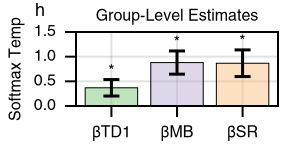

In [24]:
r = r_TDlam11_BTD_1_BMB1_BSR1_homeaway

println("p(βTD): $(r.pvalues[1])")
println("p(βMB): $(r.pvalues[2])")
println("p(βSR): $(r.pvalues[3])")

f = Figure(size=72 .* (2.0, 1.0), fontsize=8, fonts = (; regular = "Helvetica"), figure_padding = (5,5,3,5))
ax = Axis(f[1,1], xticks = (1:3, ["βTD1", "βMB", "βSR"]),
    ylabel="Softmax Temp",
    title="Group-Level Estimates",
)
ylims!(0, 1.5)
colors = categorical_colors(:Accent_6, 6)

barplot!(1, r.betas[1],
    color=(colors[1], 0.5),
    strokewidth = 0.5,
)
barplot!(2, r.betas[2],
    color=(colors[2], 0.5),
    strokewidth = 0.5,
)
barplot!(3, r.betas[3],
    color=(colors[3], 0.5),
    strokewidth = 0.5,
)
errorbars!([1], [r.betas[1]], [1.96 * r.standarderrors[1]]; whiskerwidth = 8, color=:black)
errorbars!([2], [r.betas[2]], [1.96 * r.standarderrors[2]]; whiskerwidth = 8, color=:black)
errorbars!([3], [r.betas[3]], [1.96 * r.standarderrors[3]]; whiskerwidth = 8, color=:black)
text!(0.95, r.betas[1] + 1.96 * r.standarderrors[1]; text="*")
text!(1.95, r.betas[2] + 1.96 * r.standarderrors[2]; text="*")
text!(2.95, r.betas[3] + 1.96 * r.standarderrors[3]; text="*")

Label(f[1, 1, TopLeft()], "h", fontsize = 9, font = :bold, padding = (0, 15, 0, -10), halign = :right)
save("figures/single_beta_temps.pdf", f, pt_per_unit = 1.0)
f

## Blockwise fits

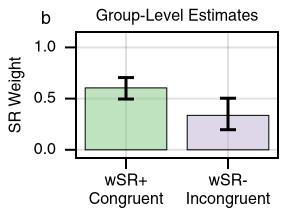

In [25]:
r = r_TDlam11_BTD_1_BTD_2_wSR1_wSR2_BMBSR_1_BMBSR_2_homeaway
wSR1_ind = findfirst(x -> x == "wSR1", r.varnames)
wSR2_ind = findfirst(x -> x == "wSR2", r.varnames)

f = Figure(size=72 .* (2.0, 1.5), fontsize=8, fonts = (; regular = "Helvetica"))
ax = Axis(f[1,1], xticks = (1:2, ["wSR+\nCongruent", "wSR-\nIncongruent"]),
    ylabel="SR Weight",
    title="Group-Level Estimates",
)
colors = categorical_colors(:Accent_6, 6)

barplot!(1, unitnorm(r.betas[wSR1_ind]),
    color=(colors[1], 0.5),
    strokewidth = 0.5,
)
barplot!(2, unitnorm(r.betas[wSR2_ind]),
    color=(colors[2], 0.5),
    strokewidth = 0.5,
)
rangebars!([1],  unitnorm(r.betas[wSR1_ind] + 1.96 * r.standarderrors[wSR1_ind]), unitnorm(r.betas[wSR1_ind] - 1.96 * r.standarderrors[wSR1_ind]); whiskerwidth = 8, color=:black)
rangebars!([2],  unitnorm(r.betas[wSR2_ind] + 1.96 * r.standarderrors[wSR2_ind]), unitnorm(r.betas[wSR2_ind] - 1.96 * r.standarderrors[wSR2_ind]); whiskerwidth = 8, color=:black)
Label(f[1, 1, TopLeft()], "b", fontsize = 9, font = :bold, padding = (0, 12, 2, 0), halign = :right)
ylims!(-0.08, 1.15)
save("figures/wSR_comparison.pdf", f, pt_per_unit = 1.0)
f

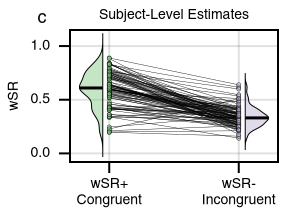

In [26]:
colors = categorical_colors(:Accent_6, 6)

r = r_TDlam11_BTD_1_BTD_2_wSR1_wSR2_BMBSR_1_BMBSR_2_homeaway
wSR1_ind = findfirst(x -> x == "wSR1", r.varnames)
wSR2_ind = findfirst(x -> x == "wSR2", r.varnames)

f = Figure(size=72 .* (2.0, 1.5))
ax = Axis(f[1,1], xticks = (1:2, ["wSR+\nCongruent", "wSR-\nIncongruent"]),
    ylabel="wSR",
    palette = (; patchcolor = colors),
    title = "Subject-Level Estimates",
)
x = repeat([1], inner=100) .- 0.05
violin!(x, unitnorm.(r.x[:,wSR1_ind]),
        side = :left,
        strokecolor = :black, strokewidth = 0.5,
        color=(colors[1], 0.45),
        width=0.45,
        show_median=true,
        mediancolor=:black,
)
x = repeat([2], inner=100) .+ 0.05
violin!(x, unitnorm.(r.x[:,wSR2_ind]),
        side = :right,
        strokecolor = :black, strokewidth = 0.5,
        color=(colors[2], 0.45),
        width=0.45,
        show_median=true,
        mediancolor=:black,
)
for i in 1:100
    lines!([1, 2], unitnorm.([r.x[i,wSR1_ind], r.x[i,wSR2_ind]]), color=:black, linewidth=0.2)
    scatter!([1], unitnorm.([r.x[i,wSR1_ind]]), color=(colors[1], 0.5), strokewidth=0.2, markersize=3)
    scatter!([2], unitnorm.([r.x[i,wSR2_ind]]), color=(colors[2], 0.5), strokewidth=0.2, markersize=3)
end
Label(f[1, 1, TopLeft()], "c", fontsize = 9, font = :bold, padding = (0, 12, 2, 0), halign = :right)
ylims!(-0.08, 1.15)
save("figures/mbsr_blockwise_subjectlevel.pdf", f, pt_per_unit=1.0)
f